# Thompson Sampling in Python
<hr>

## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<hr>

## Importing the Dataset

In [2]:
dataset = pd.read_csv("Ads_CTR_Optimisation.csv")

<hr>

## Implementing Thompson Sampling

In [3]:
import random

N = 10000
d = 10
ads_selected = []
nums_of_rewards_1 = [0] * d
nums_of_rewards_0 = [0] * d
total_reward = 0

for n in range(0, N):
    ad = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(nums_of_rewards_1[i] + 1, nums_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            ad = i
    ads_selected.append(ad)
    reward = dataset.values[n, ad]
    if reward == 1:
        nums_of_rewards_1[ad] += 1
    else:
        nums_of_rewards_0[ad] += 1
    total_reward += reward

<hr>

## Visualising the results - Histogram

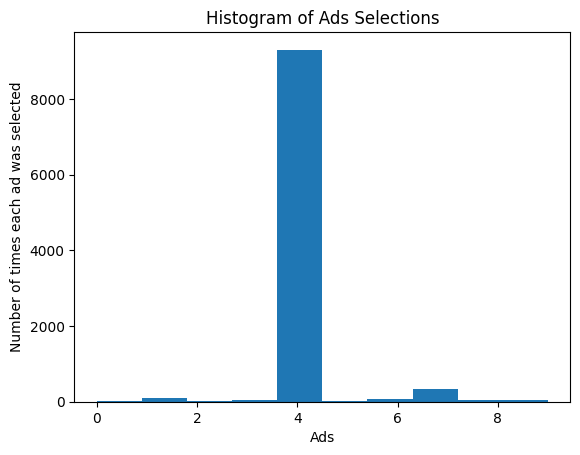

In [4]:
plt.hist(ads_selected)
plt.title("Histogram of Ads Selections")
plt.xlabel("Ads")
plt.ylabel("Number of times each ad was selected")
plt.show()